In [17]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [18]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [6]:
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


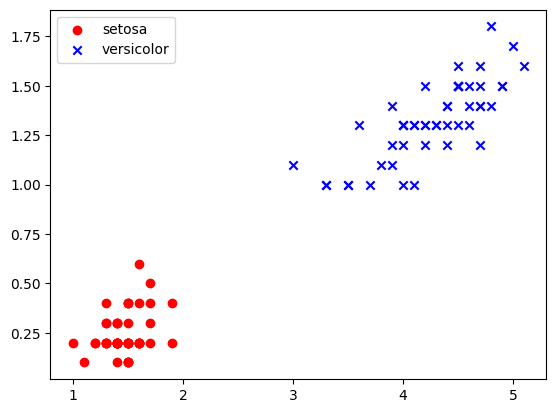

In [7]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [2, 3]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

# plt.xlabel('sepal length [cm]')
# plt.ylabel('petal length [cm]')
plt.legend(loc='upper left');

Text(0, 0.5, 'Number of updates')

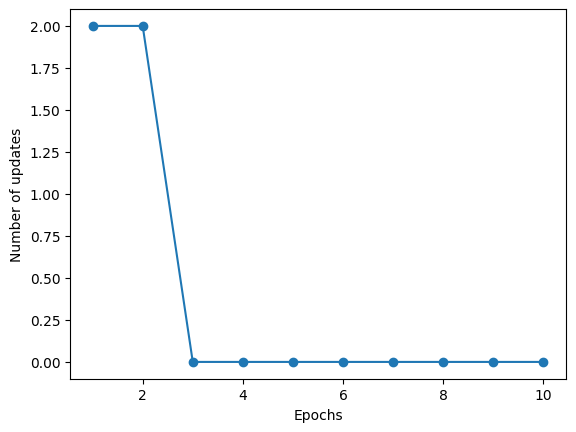

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

In [19]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

ValueError: 'red' is not a valid color value.

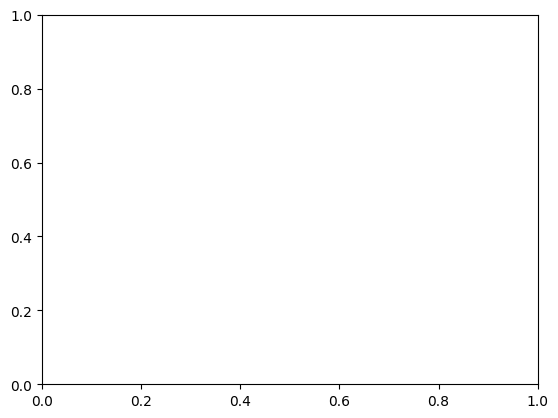

In [20]:
plot_decision_regions(X, y, classifier=ppn)
# plt.xlabel('sepal length [cm]')
# plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

In [43]:
# KLASA ADALINE

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute linear activation"""
        return z

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)




In [ ]:
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [2, 3]].values

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

In [ ]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01');

In [ ]:
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001');

In [ ]:
fig

In [15]:
X_std = np.empty(X.shape)
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

fig = plt.figure(figsize=(10, 4))
ada_gd = AdalineGD(n_iter=15, eta=0.01).fit(X_std, y)
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.01 (Standarized)');

NameError: name 'AdalineGD' is not defined

<Figure size 1000x400 with 0 Axes>

In [14]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout();

NameError: name 'X_std' is not defined

In [16]:
df = pd.read_csv("iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
import seaborn as sns
sns.set()

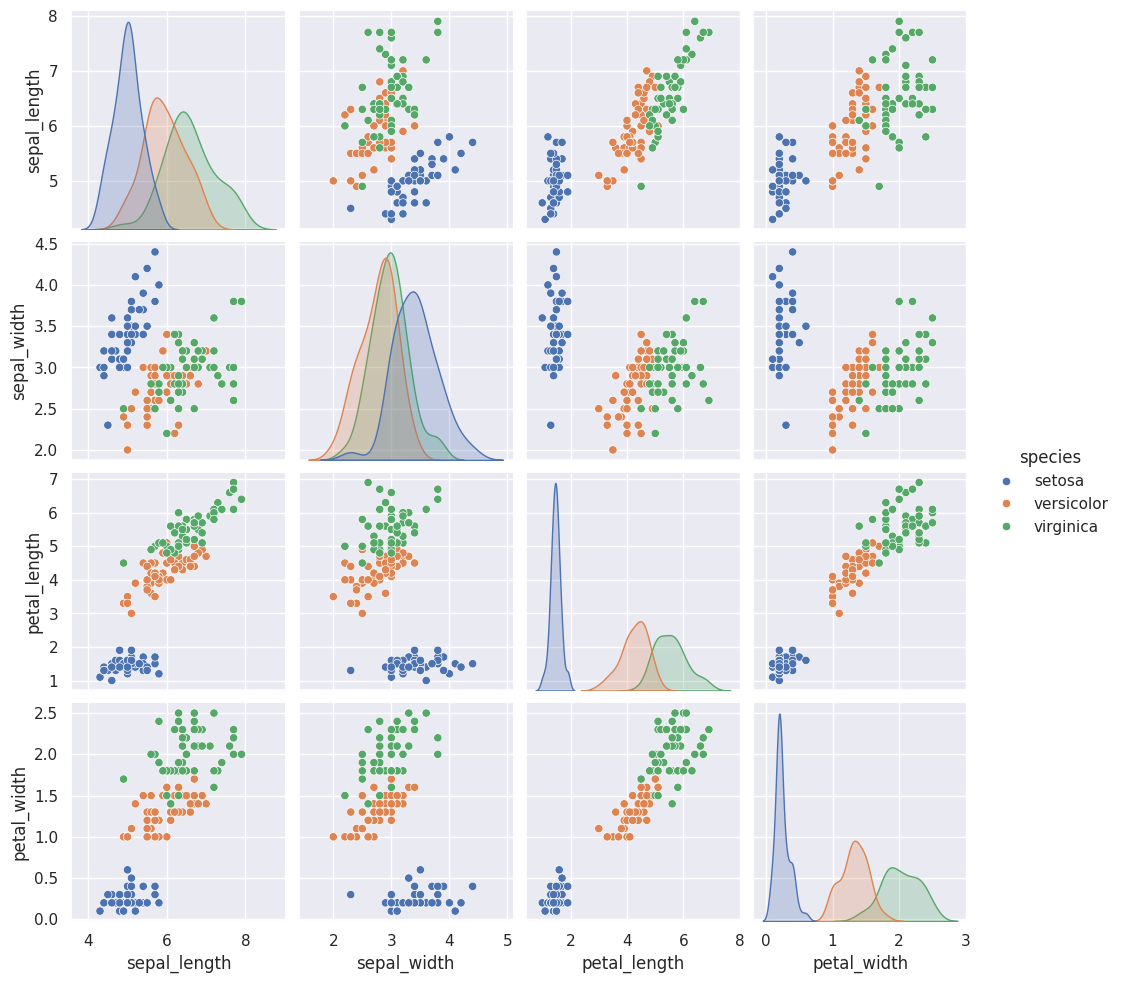

In [22]:
sns.pairplot(df, hue='species');

In [23]:
X = df.iloc[:100, :4]   # setosa and versicolor
y = df.iloc[:100, 4]
X.shape, y.shape

((100, 4), (100,))

In [24]:
from sklearn.linear_model import Perceptron

In [25]:
ppn = Perceptron().fit(X, y)

In [27]:
ppn.score(X, y)

1.0

In [28]:
X1 = df.iloc[50:, :4]   # versicolor and virginica
y1 = df.iloc[50:, 4]
X1.shape, y1.shape

((100, 4), (100,))

In [29]:
ppn1 = Perceptron().fit(X1, y1)
ppn1.score(X1, y1)

0.74

In [30]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 4), (30, 4), (70,), (30,))

In [38]:
ppn_t = Perceptron().fit(X_train, y_train)
ppn_t.score(X_train, y_train), ppn_t.score(X_test, y_test)

(1.0, 1.0)

In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify=y1)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((70, 4), (30, 4), (70,), (30,))

In [42]:
ppn1_t = Perceptron().fit(X1_train, y1_train)
ppn1_t.score(X1_train, y1_train), ppn1_t.score(X1_test, y1_test)

(0.9857142857142858, 0.9)

In [44]:
from sklearn.preprocessing import StandardScaler

In [47]:
X1_std = pd.DataFrame(StandardScaler().fit_transform(X1), columns=X1.columns)
X1_std.mean(axis=0), X1_std.std(axis=0)

(sepal_length   -6.683543e-16
 sepal_width     1.624256e-15
 petal_length    3.269607e-16
 petal_width    -1.443845e-15
 dtype: float64,
 sepal_length    1.005038
 sepal_width     1.005038
 petal_length    1.005038
 petal_width     1.005038
 dtype: float64)

In [64]:
X1_std_train, X1_std_test, y1_train, y1_test = train_test_split(X1_std, y1, test_size=0.3, stratify=y1)
X1_std_train.shape, X1_std_test.shape, y1_train.shape, y1_test.shape

((70, 4), (30, 4), (70,), (30,))

In [51]:
from sklearn.linear_model import RidgeClassifier

In [65]:
rc1 = RidgeClassifier(alpha=0.0).fit(X1_std_train, y1_train)
rc1.score(X1_std_train, y1_train), rc1.score(X1_std_test, y1_test)

(0.9714285714285714, 0.9666666666666667)

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

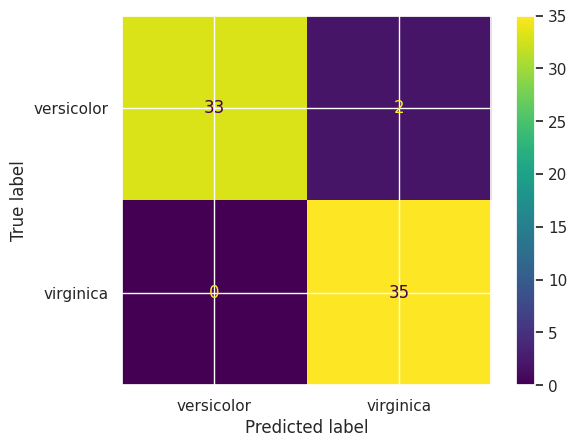

In [68]:
ConfusionMatrixDisplay.from_estimator(rc1, X1_std_train, y1_train);